## 偏差

### 发散型包点图 （Diverging Dot Plot）

发散型包点图 （Diverging Dot Plot）也类似于发散型条形图 （Diverging Bars）。 然而，与发散型条形图 （Diverging Bars）相比，条的缺失减少了组之间的对比度和差异。

### 导入所需要的库

In [1]:
import numpy as np              # 导入numpy库
import pandas as pd             # 导入pandas库
import matplotlib as mpl        # 导入matplotlib库
import matplotlib.pyplot as plt
import seaborn as sns           # 导入seaborn库

### 设定图像各种属性

In [2]:
large = 22; med = 16; small = 12

params = {'axes.titlesize': large,    # 设置子图上的标题字体
            'legend.fontsize': med,     # 设置图例的字体
            'figure.figsize': (16, 10), # 设置图像的画布
           'axes.labelsize': med,      # 设置标签的字体
            'xtick.labelsize': med,     # 设置x轴上的标尺的字体
            'ytick.labelsize': med,     # 设置整个画布的标题字体
          'figure.titlesize': large}  
plt.rcParams.update(params)           # 更新默认属性
plt.style.use('seaborn-whitegrid')    # 设定整体风格
sns.set_style("white")                # 设定整体背景风格

### 测试版本

In [3]:
print(mpl.__version__)
print(sns.__version__)
print(pd.__version__)
print(np.__version__)

3.1.0
0.9.0
0.24.2
1.16.4


### 程序代码

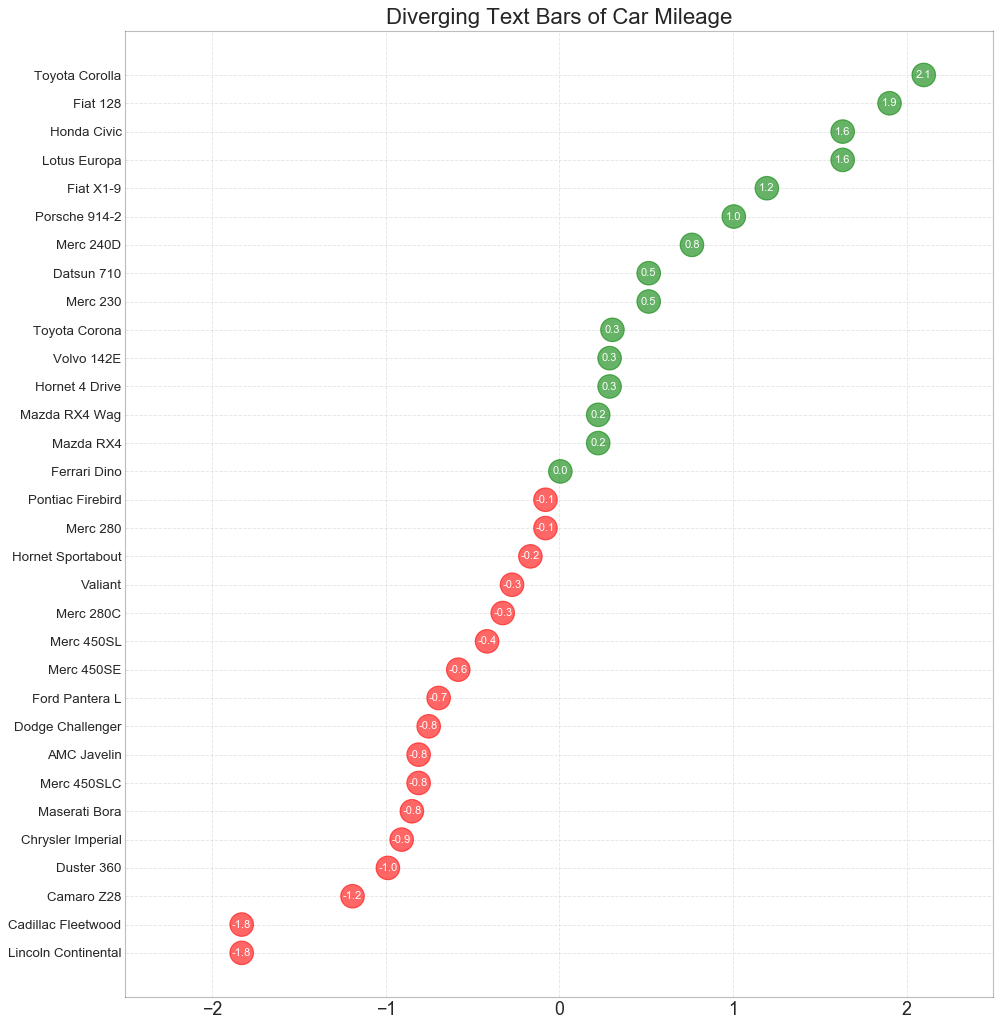

In [10]:
# step1:导入数据
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, 'mpg']                                              # 获取mpg这一列数据
    # z-score 标准化(正太标准化)：将数据按期属性（按列进行）减去其均值，并处以其方差。得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1。
df['mpg_z'] = (x - x.mean()) / x.std()
    # 列表推导式
    # 小于0__红色，大于0__绿色
df['colors'] = ['red' if x <0 else 'green' for x in df['mpg_z']]  # 颜色标签
df.sort_values('mpg_z', inplace = True)                           # 对'mpg_z这一列数据进行排序
df.reset_index(inplace = True)                                    # 对排序后的数据重置索引

# step2:绘制发散型包点图
    # 画布
plt.figure(figsize = (14, 16),   # 画布尺寸
           dpi = 80)             # 分辨率
    # 绘制散点图
plt.scatter(df.mpg_z,            # 横坐标
            df.index,            # 纵坐标
           s = 450,              # 散点的尺寸
           alpha = 0.6,          # 散点的透明度
            color = df.colors)   # 散点的颜色
    # 绘制文本图
for x, y, text in zip(df.mpg_z, df.index, df.mpg_z):                # 使用zip() 函数用于将可迭代的对象作为参数
    t = plt.text(x,                                                 # 文本位置的横坐标
                 y,                                                 # 文本位置的纵坐标
                round(text, 1),                                     # 对text保留2位小数(照指定的小数位数进行四舍五入运算的结果)
                horizontalalignment = 'center',                     # 水平对齐
                verticalalignment = 'center',                       # 垂直对齐
                fontdict = {'color':'white'})                       # 用于覆盖默认文本属性的字典（添加颜色和尺寸）

# step3:装饰图像
    # 坐标轴设置
plt.gca().spines['top'].set_alpha(.3)                               # 对顶轴进行透明度处理，设置为0.3                              
plt.gca().spines['bottom'].set_alpha(.3)                            # 对底轴进行透明度处理，设置为0.3
plt.gca().spines['right'].set_alpha(.3)                             # 对右轴进行透明度处理，设置为0.3
plt.gca().spines['left'].set_alpha(.3)                              # 对左轴进行透明度处理，设置为0.3
    # y轴标签
plt.yticks(df.index,                                # 放置刻度的位置列表
           df.cars,                                 # 放置给定位置列表的标签列表
           fontsize = 12)                           # 字体尺寸
    # 设置图像标题
plt.title('Diverging Text Bars of Car Mileage',     # 图像标题名称
          fontdict={'size':20})                     # 字体尺寸
    # 设置网格线
plt.grid(linestyle = '--',                          # 网格线类型
         alpha = 0.5)                               # 网格线透明度
    # 设置当前x坐标轴的范围
plt.xlim(-2.5,                                      
         2.5)
plt.show()                                          # 显示图像